<a href="https://colab.research.google.com/github/liliililliiil/my-projects/blob/main/global_temperature_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌏 1961년도 부터 2019 년도 까지의 지구의 온도 변화

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding = 'latin-1')
df

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


In [ ]:
faostat_1 = pd.read_csv('FAOSTAT_data_11-24-2020.csv')

#### 결측치 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [ ]:
df.shape

(9656, 66)

#### 필요없는 컬럼 삭제

In [ ]:
tem_change = df.drop(columns = ['Area Code', 'Months Code', 'Element Code', 'Unit'])

In [ ]:
tem_change[tem_change['Element'] == 'Temperature change']

,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,Temperature change,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,Temperature change,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,OECD,DecJanFeb,Temperature change,0.561,-0.362,-0.222,0.098,-0.732,-0.274,-0.165,...,1.272,0.770,1.709,1.327,0.686,1.307,2.636,1.884,1.453,1.527
9648,OECD,MarAprMay,Temperature change,-0.038,-0.189,0.141,-0.590,-0.110,-0.078,-0.334,...,1.742,0.390,1.442,0.475,0.778,1.191,1.928,1.237,1.241,1.352
9650,OECD,JunJulAug,Temperature change,0.101,0.052,-0.047,-0.114,-0.495,-0.015,-0.184,...,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
9652,OECD,SepOctNov,Temperature change,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233


#### Months 컬럼에 그지같은 뭔 Dec & Jan & Feb 어쩌고랑 Meteor.. 이거 빼고 호출

In [ ]:
tem_change = tem_change.loc[tem_change.Months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]
tem_change

,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,OECD,October,Standard Deviation,0.635,0.635,0.635,0.635,0.635,0.635,0.635,...,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635
9642,OECD,November,Temperature change,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,...,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364,1.030
9643,OECD,November,Standard Deviation,0.435,0.435,0.435,0.435,0.435,0.435,0.435,...,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435
9644,OECD,December,Temperature change,-0.576,0.258,-0.362,-1.303,0.631,-0.021,0.316,...,0.590,1.874,0.934,-0.324,1.994,2.652,0.809,1.635,2.187,2.432


In [ ]:
tem_change.shape

(6816, 62)

In [ ]:
tem_change.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

#### 깔끔하게 연도 아래로 melt

In [ ]:
tem_change = pd.melt(tem_change, id_vars = ['Area', 'Months', 'Element'], var_name = 'Year', value_name = 'value')
tem_change

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,Y1961,0.777
1,Afghanistan,January,Standard Deviation,Y1961,1.950
2,Afghanistan,February,Temperature change,Y1961,-1.743
3,Afghanistan,February,Standard Deviation,Y1961,2.597
4,Afghanistan,March,Temperature change,Y1961,0.516
...,...,...,...,...,...
402139,OECD,October,Standard Deviation,Y2019,0.635
402140,OECD,November,Temperature change,Y2019,1.030
402141,OECD,November,Standard Deviation,Y2019,0.435
402142,OECD,December,Temperature change,Y2019,2.432


#### 연도 str -> float

In [ ]:
tem_change['Year'] = tem_change['Year'].str[1:].astype('str')
tem_change

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
402139,OECD,October,Standard Deviation,2019,0.635
402140,OECD,November,Temperature change,2019,1.030
402141,OECD,November,Standard Deviation,2019,0.435
402142,OECD,December,Temperature change,2019,2.432


In [ ]:
tem_change.dropna()

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
402139,OECD,October,Standard Deviation,2019,0.635
402140,OECD,November,Temperature change,2019,1.030
402141,OECD,November,Standard Deviation,2019,0.435
402142,OECD,December,Temperature change,2019,2.432


In [ ]:
tem_change

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
402139,OECD,October,Standard Deviation,2019,0.635
402140,OECD,November,Temperature change,2019,1.030
402141,OECD,November,Standard Deviation,2019,0.435
402142,OECD,December,Temperature change,2019,2.432


#### 대륙과 연합국가 제외

In [ ]:
tem_other = tem_change['Area'].isin(['World', 'Africa',
        'Eastern Africa', 'Middle Africa', 'Northern Africa',
        'Southern Africa', 'Western Africa', 'Americas',
        'Northern America', 'Central America', 'Caribbean',
        'South America', 'Asia', 'Central Asia', 'Eastern Asia',
        'Eastern Europe', 'Northern Europe', 'Southern Europe',
        'Western Europe', 'Oceania', 'Australia and New Zealand',
        'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
        'Least Developed Countries', 'Land Locked Developing Countries',
        'Small Island Developing States',
        'Low Income Food Deficit Countries',
        'Net Food Importing Developing Countries', 'Annex I countries',
        'Non-Annex I countries', 'OECD'])

In [ ]:
tem_change_c = tem_change.loc[tem_change.Area.isin(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia',
       'French Southern and Antarctic Territories', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique',
       'Mauritania', 'Mauritius', 'Mayotte', 'Mexico',
       'Micronesia (Federated States of)', 'Midway Island', 'Monaco',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
       'Netherlands Antilles (former)', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island',
       'North Macedonia', 'Norway', 'Oman',
       'Pacific Islands Trust Territory', 'Pakistan', 'Palau',
       'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Pitcairn Islands', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Republic of Moldova',
       'Réunion', 'Romania', 'Russian Federation', 'Rwanda',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Serbia and Montenegro', 'Seychelles',
       'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa',
       'South Georgia and the South Sandwich Islands', 'South Sudan',
       'Spain', 'Sri Lanka', 'Sudan', 'Sudan (former)', 'Suriname',
       'Svalbard and Jan Mayen Islands', 'Sweden', 'Switzerland',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United Republic of Tanzania', 'United States of America',
       'United States Virgin Islands', 'Uruguay', 'USSR', 'Uzbekistan',
       'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam',
       'Wake Island', 'Wallis and Futuna Islands', 'Western Sahara',
       'Yemen', 'Yugoslav SFR', 'Zambia', 'Zimbabwe'])]

In [ ]:
tem_change_c

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
401251,Zimbabwe,October,Standard Deviation,2019,0.727
401252,Zimbabwe,November,Temperature change,2019,2.448
401253,Zimbabwe,November,Standard Deviation,2019,0.861
401254,Zimbabwe,December,Temperature change,2019,2.083


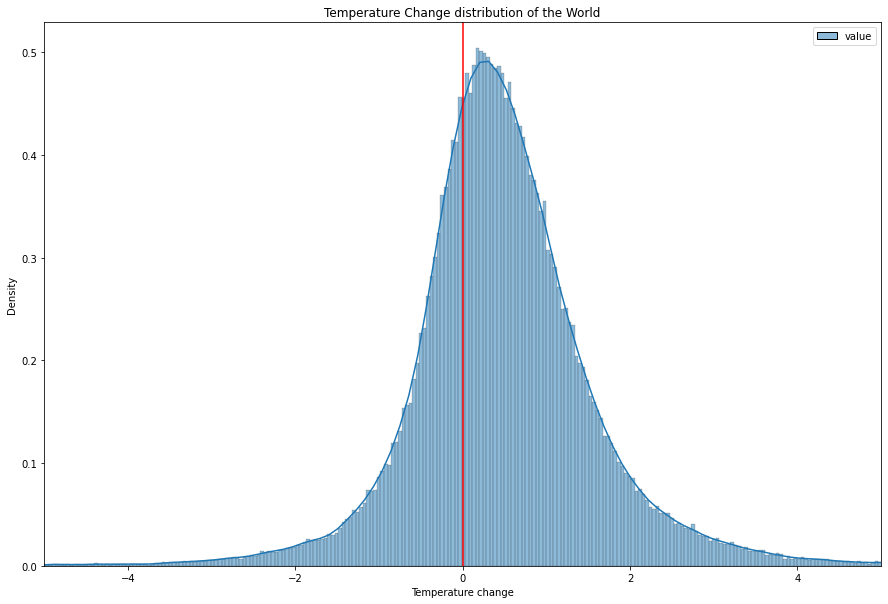

In [ ]:
plt.figure(figsize = (15, 10))
sns.histplot(tem_change_c.loc[tem_change['Element'] == 'Temperature change'], kde = True, stat = 'density')
plt.axvline(x = 0.0, color = 'red', linestyle = '-')
plt.xlabel('Temperature change')
plt.title('Temperature Change distribution of the World')
plt.xlim(-5, 5)
plt.show()

In [ ]:
tem_change_c

,Area,Months,Element,Year,value
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
401251,Zimbabwe,October,Standard Deviation,2019,0.727
401252,Zimbabwe,November,Temperature change,2019,2.448
401253,Zimbabwe,November,Standard Deviation,2019,0.861
401254,Zimbabwe,December,Temperature change,2019,2.083


#### 연도별 모든 국가의 기온 변화

In [ ]:
avg_tem_c = tem_change_c.loc[tem_change_c['Element'] == 'Temperature change'].groupby(['Year'], as_index = False).mean()
avg_tem_c

,Year,value
0,1961,0.135760
1,1962,-0.034665
2,1963,-0.033998
3,1964,-0.120832
4,1965,-0.216695
5,1966,0.096316
6,1967,-0.146114
7,1968,-0.155237
8,1969,0.110146
9,1970,0.069124


C:\Users\nsa28\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nsa28\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


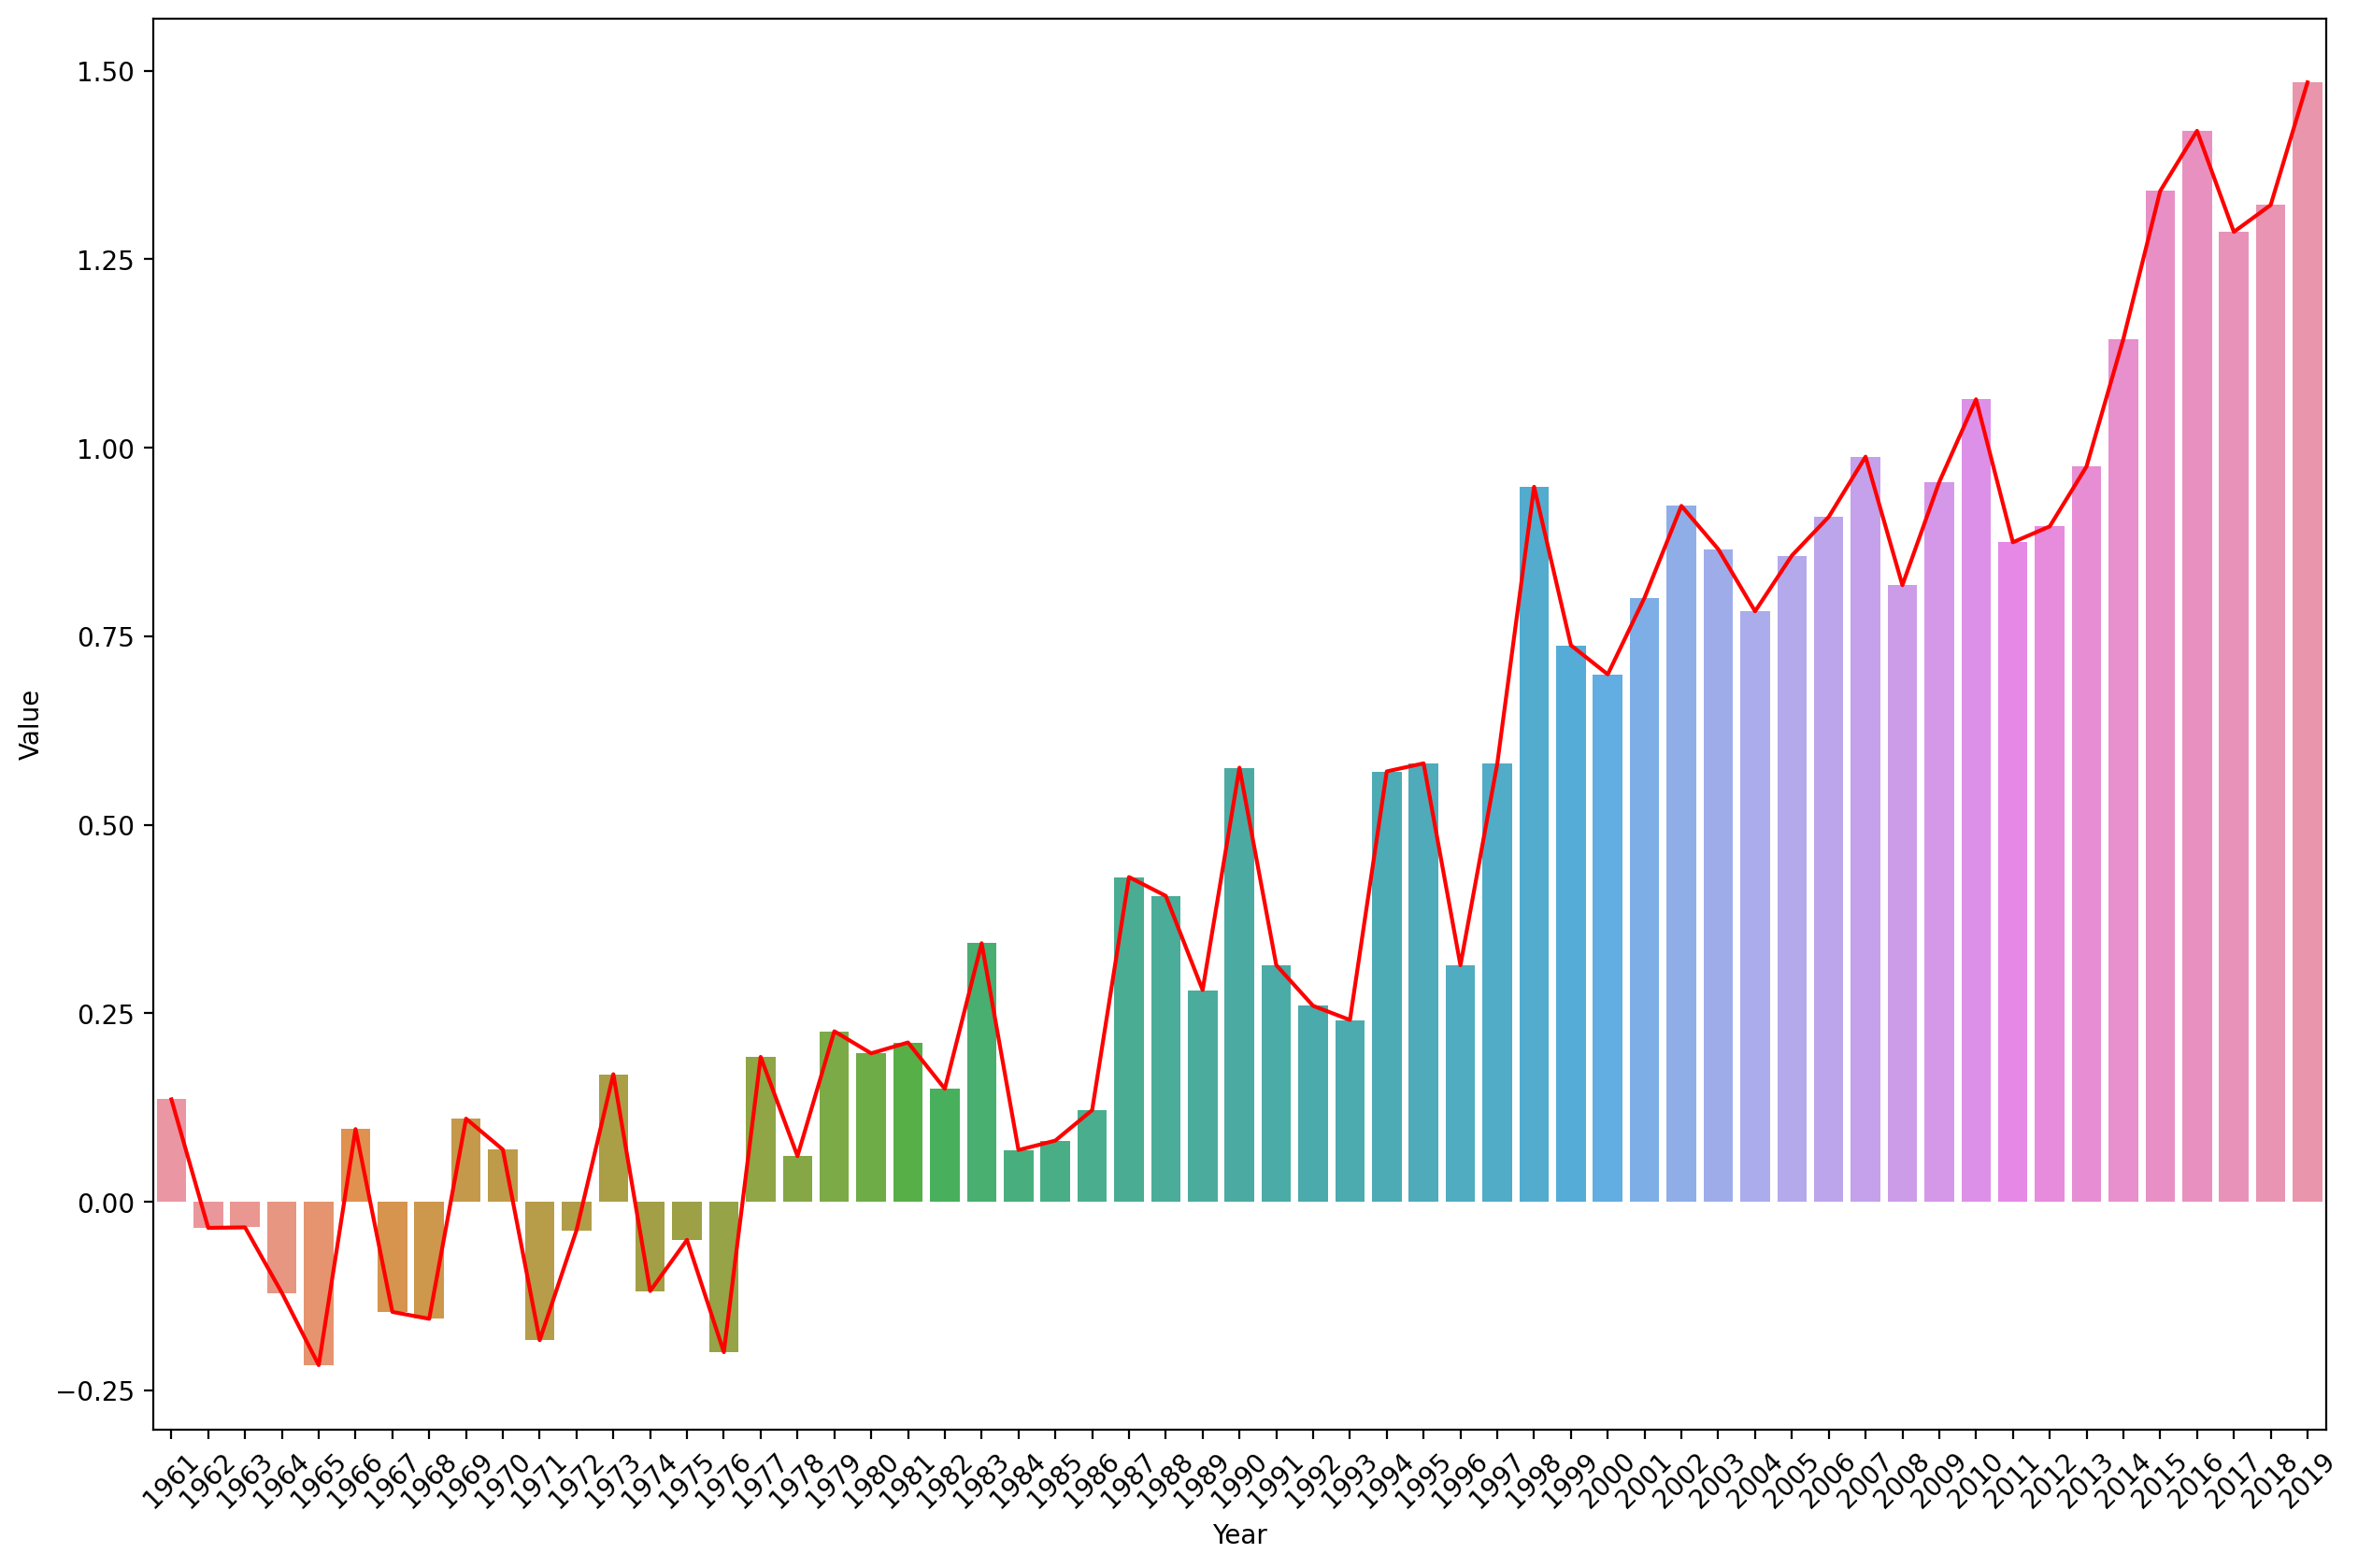

In [ ]:
plt.figure(figsize = (15, 10), dpi = 200)
sns.lineplot(avg_tem_c['Year'], avg_tem_c['value'], color = 'red')
sns.barplot(avg_tem_c['Year'], avg_tem_c['value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(avg_tem_c['Year'], rotation = 45)
plt.show()

In [ ]:
avg_tem_all = tem_change.loc[tem_change['Element'] == 'Temperature change'].groupby(['Area', 'Year'], as_index = False).mean()
avg_tem_all

,Area,Year,value
0,Afghanistan,1961,0.072750
1,Afghanistan,1962,-0.229833
2,Afghanistan,1963,0.891583
3,Afghanistan,1964,-0.980000
4,Afghanistan,1965,0.010000
...,...,...,...
16751,Zimbabwe,2015,1.258333
16752,Zimbabwe,2016,1.164583
16753,Zimbabwe,2017,0.224833
16754,Zimbabwe,2018,0.547167


C:\Users\nsa28\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


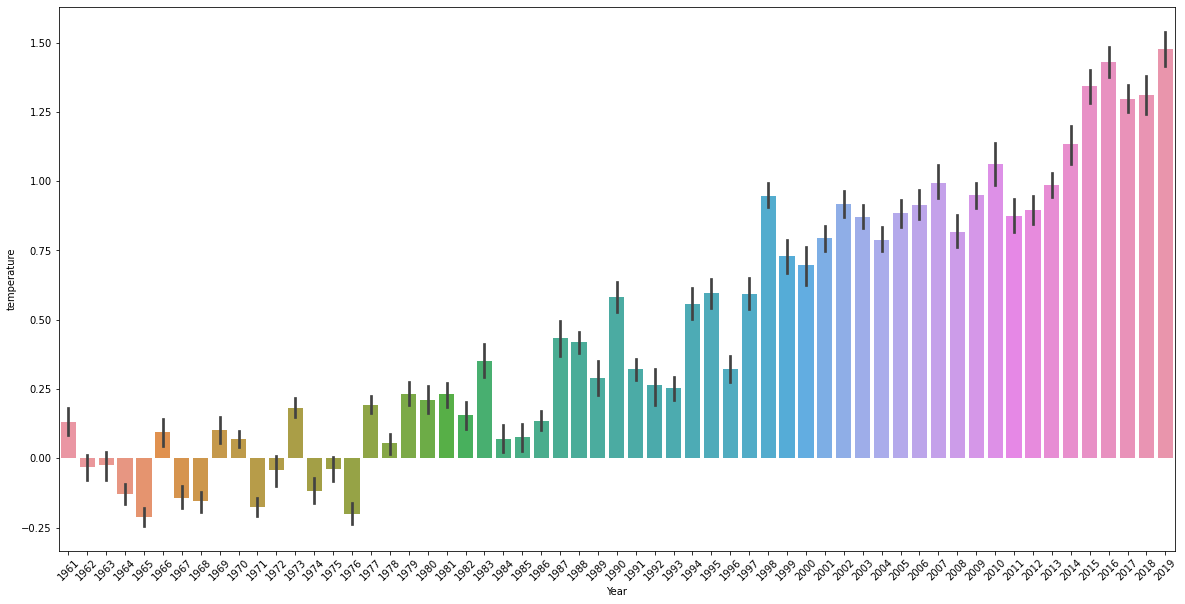

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(avg_tem_all['Year'], avg_tem_all['value'])
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('temperature')
plt.show()

In [ ]:
tem_change = tem_change.drop(columns = ['Area', 'Months'])
tem_change

,Element,Year,value
0,Temperature change,1961,0.777
1,Standard Deviation,1961,1.950
2,Temperature change,1961,-1.743
3,Standard Deviation,1961,2.597
4,Temperature change,1961,0.516
...,...,...,...
402139,Standard Deviation,2019,0.635
402140,Temperature change,2019,1.030
402141,Standard Deviation,2019,0.435
402142,Temperature change,2019,2.432


In [ ]:
tem_change = tem_change.loc[tem_change.Element.isin(['Temperature change'])]
tem_change

,Element,Year,value
0,Temperature change,1961,0.777
2,Temperature change,1961,-1.743
4,Temperature change,1961,0.516
6,Temperature change,1961,-1.709
8,Temperature change,1961,1.412
...,...,...,...
402134,Temperature change,2019,1.034
402136,Temperature change,2019,1.542
402138,Temperature change,2019,1.127
402140,Temperature change,2019,1.030


In [ ]:
tem_change = tem_change.reset_index()
tem_change

,index,Element,Year,value
0,0,Temperature change,1961,0.777
1,2,Temperature change,1961,-1.743
2,4,Temperature change,1961,0.516
3,6,Temperature change,1961,-1.709
4,8,Temperature change,1961,1.412
...,...,...,...,...
201067,402134,Temperature change,2019,1.034
201068,402136,Temperature change,2019,1.542
201069,402138,Temperature change,2019,1.127
201070,402140,Temperature change,2019,1.030


In [ ]:
tem_change = tem_change.drop(columns = 'index')
tem_change

,Element,Year,value
0,Temperature change,1961,0.777
1,Temperature change,1961,-1.743
2,Temperature change,1961,0.516
3,Temperature change,1961,-1.709
4,Temperature change,1961,1.412
...,...,...,...
201067,Temperature change,2019,1.034
201068,Temperature change,2019,1.542
201069,Temperature change,2019,1.127
201070,Temperature change,2019,1.030


In [ ]:
tem_change = tem_change.dropna()
tem_change

,Element,Year,value
0,Temperature change,1961,0.777
1,Temperature change,1961,-1.743
2,Temperature change,1961,0.516
3,Temperature change,1961,-1.709
4,Temperature change,1961,1.412
...,...,...,...
201067,Temperature change,2019,1.034
201068,Temperature change,2019,1.542
201069,Temperature change,2019,1.127
201070,Temperature change,2019,1.030


In [ ]:
from sklearn.model_selection import train_test_split
y = tem_change['value'].loc[tem_change['Element'] == 'Temperature change']
x = tem_change.drop(columns = ['value', 'Element']).loc[tem_change['Element'] == 'Temperature change']

x_train, y_train, x_target, y_target = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [ ]:
print(x_train.shape, y_train.shape)

(143833, 1) (35959, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, x_target)

LinearRegression()

In [ ]:
lr.predict([[2022]])

C:\Users\nsa28\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.30758083])

In [ ]:
pred_data = pd.DataFrame({'Year' : np.arange(2021, 2061)})
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    40 non-null     int32
dtypes: int32(1)
memory usage: 288.0 bytes


In [ ]:
pred_test = lr.predict(pred_data)

In [ ]:
pred_data['value'] = pd.Series(pred_test, index = pred_data.index)

In [ ]:
pred_data

,Year,value
0,2021,1.281458
1,2022,1.307581
2,2023,1.333703
3,2024,1.359826
4,2025,1.385948
5,2026,1.412071
6,2027,1.438194
7,2028,1.464316
8,2029,1.490439
9,2030,1.516561


In [ ]:
print(lr.coef_, lr.intercept_)

[0.02612256] -51.5122282002092


C:\Users\nsa28\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


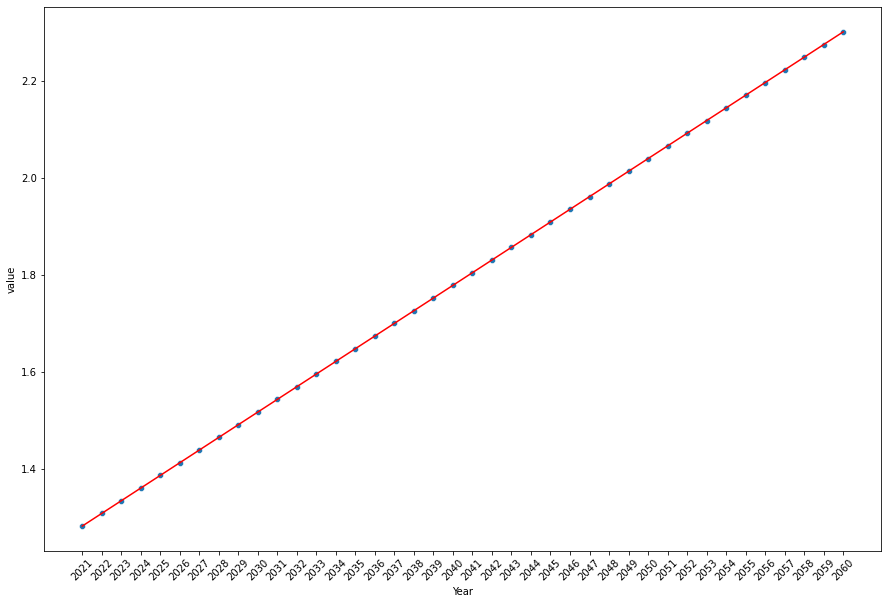

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = pred_data['Year'], y = pred_data['value'], color = 'red')
sns.scatterplot(pred_data['Year'], pred_data['value'])
plt.xlabel('Year')
plt.ylabel('value')
plt.xticks(pred_data['Year'], rotation = 45)
plt.show()

#### 비선형 예측모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
PR2_mod = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

PR3_mod = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])
# Fit the model to the training data
PR2_mod.fit(x, y)
PR3_mod.fit(x, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
PR2_test = pd.DataFrame({'Year' : np.random.randint(1980, 2060, size = 1000)})
PR2_test = PR2_test.sort_values(by = ['Year']).reset_index(drop = True).astype(str)

PR3_test = pd.DataFrame({'Year' : np.random.randint(1980, 2060, size = 1000)})
PR3_test = PR3_test.sort_values(by = ['Year']).reset_index(drop = True).astype(str)

In [ ]:
pred2_test = PR2_mod.predict(PR2_test)
pred3_test = PR3_mod.predict(PR3_test)

PR2_test['TempC'] = pd.Series(pred2_test, index = PR2_test.index)
PR3_test['TempC'] = pd.Series(pred3_test, index = PR3_test.index)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(avg_tem_c[['Year']], avg_tem_c[['value']], train_size = 0.8, random_state = 42)

In [ ]:
train_input.shape

(47, 1)

In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(train_input, train_target)

0.8897279068811278